<Axes: >

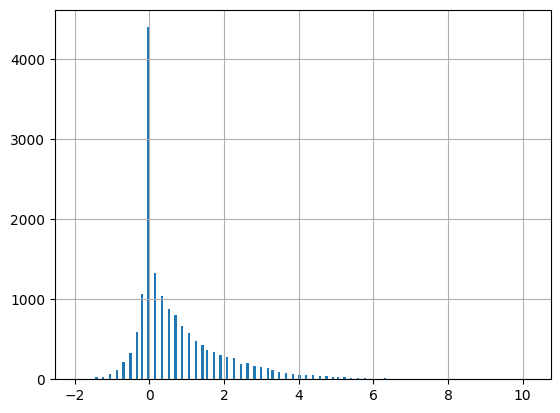

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df35 = pd.read_csv('Bfield_Mz_35_4_4_4_Ht_2_ncycles_10.csv')
df55 = pd.read_csv('Bfield_Mz_55_10_10_10_Ht_0.0_ncycles_8_ISING.csv')

df55['dMdB'] = np.gradient(df55['M_z'], df55['B_Field'])
threshold = df55['dMdB'].abs().quantile(0.999) #Clip out some ridiculously high values
df55 = df55[df55['dMdB'].abs() <= threshold]
df55['dMdB'].hist(bins = 200)


<Axes: >

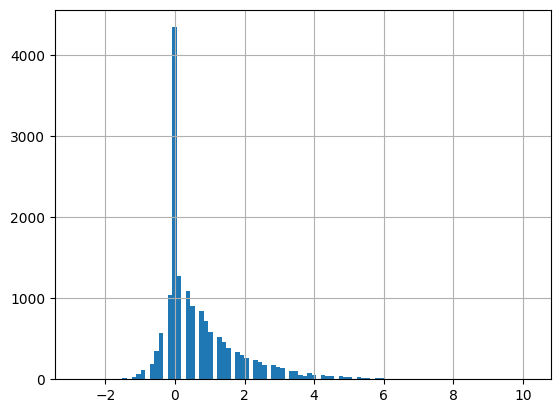

In [28]:
# df35_H0 = pd.read_csv('Bfield_Mz_35_4_4_4_Ht_0.0_ncycles_10.csv')
df55_H0 = pd.read_csv('Bfield_Mz_55_10_10_10_Ht_1.0_ncycles_8_ISING.csv')

df55_H0['dMdB'] = np.gradient(df55_H0['M_z'], df55_H0['B_Field'])
threshold = df55_H0['dMdB'].abs().quantile(0.999) #Clip out some ridiculously high values
df55_H0 = df55_H0[df55_H0['dMdB'].abs() <= threshold]
df55_H0['dMdB'].hist(bins = 100)

In [34]:
threshold = 0
B_limit = 2

In [35]:
#Find continuous segments of rows that contain at least one row with dMdB > threshold, segment defined by endpoints turning negative

def get_large_avals(df):
    large_avals = [] # list of (dB, dM)
    has_large = False
    segment_started = False
    B_segment_start = 0
    M_segment_start = 0



    for i in range(len(df)):
        if abs(df['B_Field'].iloc[i])>B_limit:
            segment_started = False
            has_large = False
            continue

        dMdB = df['dMdB'].iloc[i]
        if segment_started:
            if  dMdB > 0:
                if dMdB > threshold:
                    has_large = True
            else:
                dB = abs(B_segment_start - df['B_Field'].iloc[i])
                dM = abs(M_segment_start - df['M_z'].iloc[i])
                if has_large:
                    large_avals.append((dM, dB))
                segment_started = False
                has_large = False

        else:
            if dMdB>0:
                segment_started = True
                B_segment_start = df['B_Field'].iloc[i]
                M_segment_start = df['M_z'].iloc[i]
                if dMdB > threshold:
                    has_large = True


    return large_avals


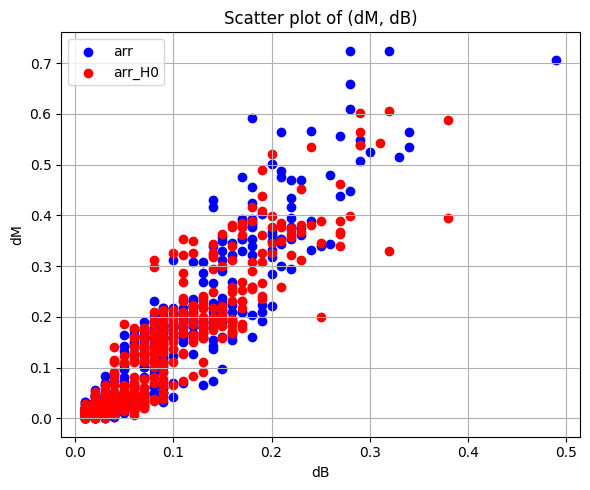

In [36]:
large_avals_H0 = get_large_avals(df55_H0)

arr_H0 = np.array(large_avals_H0)

large_avals = get_large_avals(df55)

arr = np.array(large_avals)

plt.figure(figsize=(6,5))
plt.scatter(arr[:,1], arr[:,0], color='blue', label='arr')
plt.scatter(arr_H0[:,1], arr_H0[:,0], color='red', label='arr_H0')
plt.ylabel('dM')
plt.xlabel('dB')
plt.title('Scatter plot of (dM, dB)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

#Ht = 2, swept 10 cycles of hysteresis loop, 4x4x4, concentration = 55

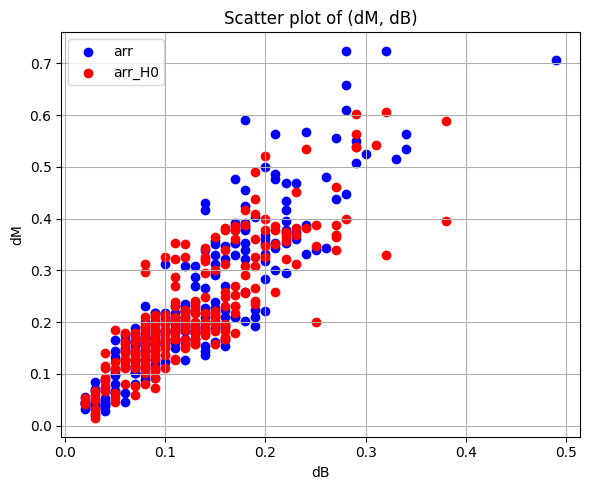

In [33]:
large_avals_H0 = get_large_avals(df55_H0)

arr_H0 = np.array(large_avals_H0)

large_avals = get_large_avals(df55)

arr = np.array(large_avals)

plt.figure(figsize=(6,5))
plt.scatter(arr[:,1], arr[:,0], color='blue', label='arr')
plt.scatter(arr_H0[:,1], arr_H0[:,0], color='red', label='arr_H0')
plt.ylabel('dM')
plt.xlabel('dB')
plt.title('Scatter plot of (dM, dB)')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

#Ht = 2, swept 10 cycles of hysteresis loop, 4x4x4, concentration = 55